In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# create a function to load the cirrhosis dataframe
def cirrhosis_func(dataframe):

       cirrhosis_df = pd.read_csv(dataframe)
       return  cirrhosis_df
cirrhosis = cirrhosis_func("cirrhosis.csv")

In [3]:
cirrhosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [4]:
#Ascites,Bilirubin,Albumin,Platelets,Prothrombin,Stage,Hepatomegaly,Spiders,Edema and Age.

In [5]:
cirrhosis.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,418.0,209.500000,120.810458,1.00,105.2500,209.50,313.75,418.00
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00


In [6]:
# Total Nan in the dataset
cirrhosis.isna().sum().sum()

1033

In [7]:
# droping NAN values from the dataset

In [8]:
# sorting out the string features and finding thee unique value each
feature_object = cirrhosis.select_dtypes(exclude=["number"])
feature_object_list = list(feature_object.columns)

unique_feature_dict ={}
for feature in feature_object_list:
    unique_feature_sorter = feature_object[feature].unique().tolist()
   
    unique_feature_dict[feature] = unique_feature_sorter 
unique_feature_dict

{'Status': ['D', 'C', 'CL'],
 'Drug': ['D-penicillamine', 'Placebo', nan],
 'Sex': ['F', 'M'],
 'Ascites': ['Y', 'N', nan],
 'Hepatomegaly': ['Y', 'N', nan],
 'Spiders': ['Y', 'N', nan],
 'Edema': ['Y', 'N', 'S']}

In [9]:
cirrhosis.drop(["ID","N_Days"],inplace = True,axis=1)

In [10]:
count = cirrhosis[cirrhosis["Sex"] == "F"][["Status","Sex"]].value_counts()

In [11]:
count_df = pd.DataFrame(count)
m = count_df["count"].tolist()
x = []
for i in count_df.index:
    x.append(str(i))



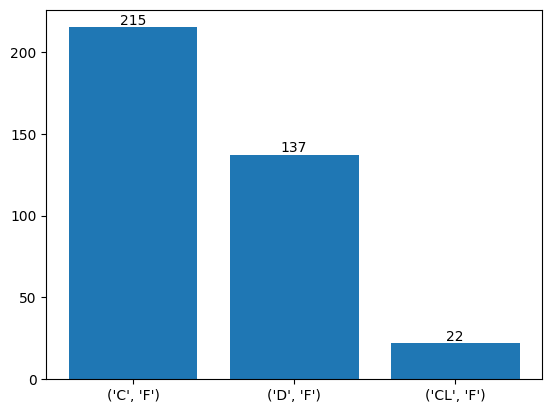

In [12]:
bar = plt.bar(x,m)
plt.bar_label(bar,labels = m)
plt.show();

In [13]:
count_f = cirrhosis[cirrhosis["Sex"] == "M"][["Status","Sex"]].value_counts()

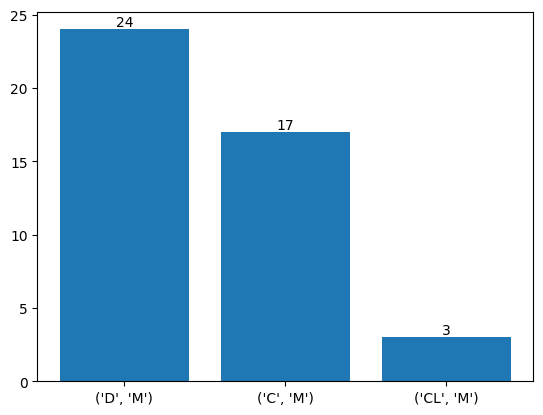

In [14]:
count_d = pd.DataFrame(count_f)
n = count_d["count"].tolist()
y = []
for i in count_d.index:
    y.append(str(i))

bar = plt.bar(x = y,height = n)
plt.bar_label(bar,labels = n)
plt.show();

In [15]:
# looping to encode string feature to numerical features
from sklearn.preprocessing import LabelEncoder
cirrhosis = cirrhosis.select_dtypes(include=["number","object"])
column_features = cirrhosis.columns.tolist()

for column_feature in column_features:
    encoder = LabelEncoder()
    if cirrhosis[column_feature].dtypes in  [ "int64","float64"]:
        continue
    else:
        cirrhosis[column_feature] = encoder.fit_transform(cirrhosis[column_feature])
      

In [16]:
#cirrhosis[(cirrhosis["Age"] >= 1) | (cirrhosis["Age"] <= 1000)]
cirrhosis["Age"] = np.random.randint(1,418,size = 418)
cirrhosis["Status"].value_counts()

Status
0    232
2    161
1     25
Name: count, dtype: int64

In [17]:
from sklearn.impute import SimpleImputer

# For numeric data: fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

cirrhosis[['Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema','Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT','Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status']] = imputer.fit_transform(cirrhosis[['Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema',
'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT','Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status']])

cirrhosis[['Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema','Status']]=cirrhosis[['Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema','Status']].astype('int64')

liver_cirrhosis = cirrhosis.round(1)
liver_cirrhosis = liver_cirrhosis[liver_cirrhosis["Age"] <= 200]
liver_cirrhosis

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2,0,91,0,1,1,1,2,14.5,261.0,2.6,156.0,1718.0,138.0,172.0,190.0,12.2,4.0
2,2,0,179,1,0,0,0,1,1.4,176.0,3.5,210.0,516.0,96.1,55.0,151.0,12.0,4.0
3,2,0,31,0,0,1,1,1,1.8,244.0,2.5,64.0,6121.8,60.6,92.0,183.0,10.3,4.0
5,2,1,9,0,0,1,0,0,0.8,248.0,4.0,50.0,944.0,93.0,63.0,257.0,11.0,3.0
7,2,1,104,0,0,0,0,0,0.3,280.0,4.0,52.0,4651.2,28.4,189.0,373.0,11.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,0,2,53,0,2,2,2,0,1.0,369.5,3.6,97.6,1982.7,122.6,124.7,244.0,10.8,3.0
412,0,2,54,0,2,2,2,0,0.7,369.5,3.2,97.6,1982.7,122.6,124.7,312.0,10.8,3.0
414,0,2,79,0,2,2,2,0,0.9,369.5,3.8,97.6,1982.7,122.6,124.7,180.0,11.2,4.0
415,0,2,126,0,2,2,2,0,1.6,369.5,3.4,97.6,1982.7,122.6,124.7,143.0,9.9,3.0


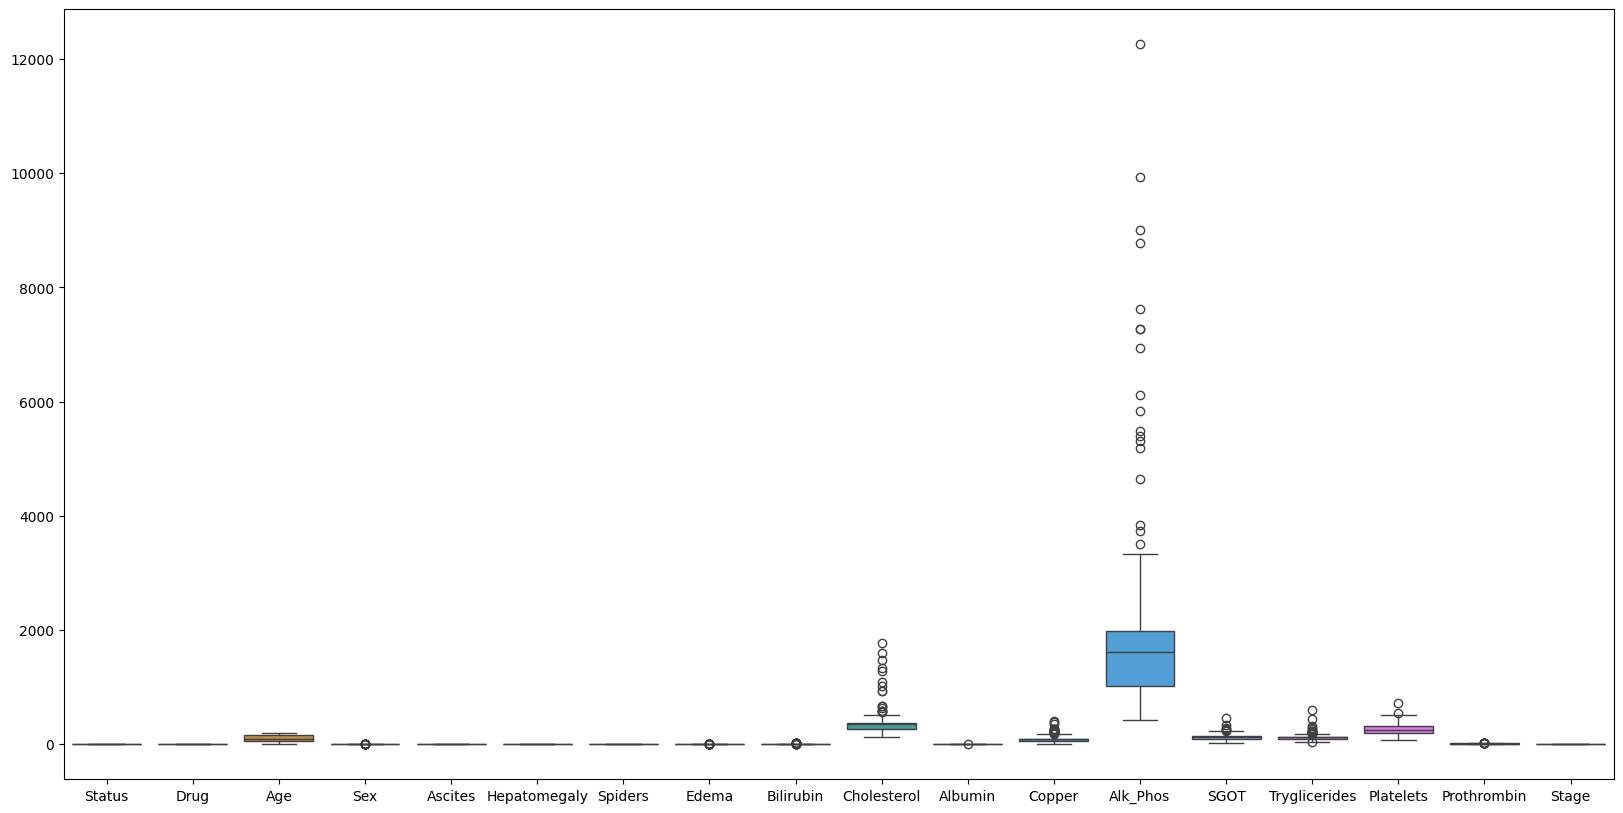

In [18]:
plt.figure(figsize=(20,10))
sns.boxplot(liver_cirrhosis);

In [19]:
liver_cirrhosis["Status"].value_counts()

Status
0    106
2     73
1     11
Name: count, dtype: int64

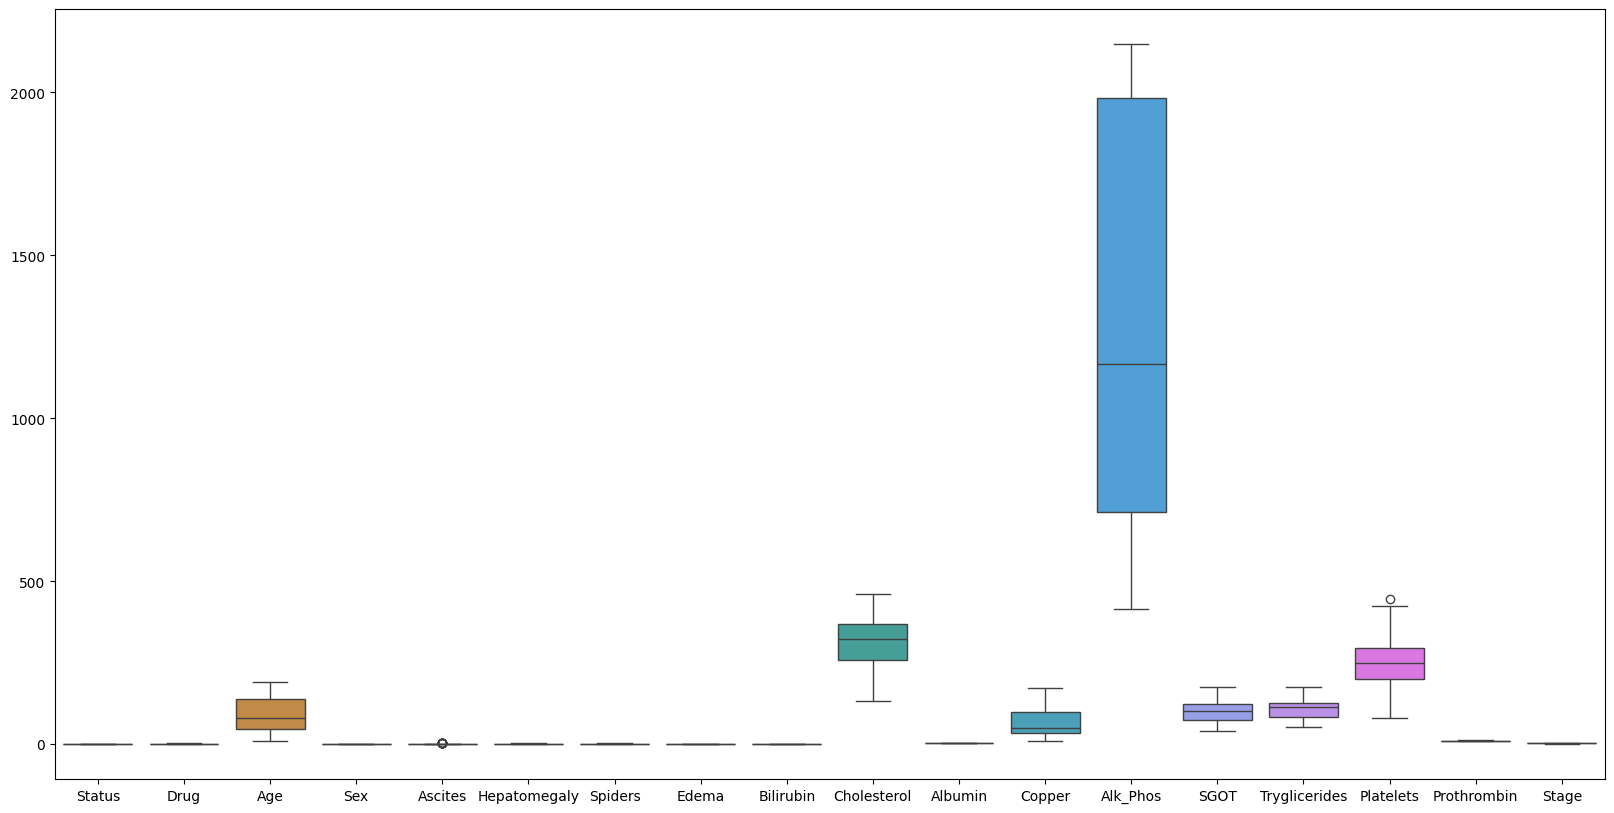

In [20]:
q1,q2 = np.percentile(liver_cirrhosis["Cholesterol"],[25,75])
iqr = q2 - q1
lower_fence = q1 - (1.5 * iqr)
higher_fence = q2 + (1.5 * iqr)

cirrh = liver_cirrhosis[(liver_cirrhosis["Cholesterol"] >= lower_fence) & (liver_cirrhosis["Cholesterol"] <= higher_fence)]

qu1,qu2 = np.percentile(cirrh["Cholesterol"],[25,75])
iqr_1 = qu2 - qu1
lower_fence = qu1 - (1.5 * iqr_1)
higher_fence = qu2 + (1.5 * iqr_1)

cirrho = cirrh[(cirrh["Cholesterol"] >= lower_fence) & (cirrh["Cholesterol"] <= higher_fence)]

qua1,qua2 = np.percentile(cirrho["Cholesterol"],[25,75])
iqr_2 = qua2 - qua1
lower_fence = qua1 - (1.5 * iqr_2)
higher_fence = qua2 + (1.5 * iqr_2)

cirrhos = cirrho[(cirrho["Cholesterol"] >= lower_fence) & (cirrho["Cholesterol"] <= higher_fence)]

quar1,quar2 = np.percentile(cirrhos["Cholesterol"],[25,75])
iqr_3 = quar2 - quar1
lower_fence = quar1 - (1.5 * iqr_3)
higher_fence = quar2 + (1.5 * iqr_3)

cirrhosi = cirrhos[(cirrhos["Cholesterol"] >= lower_fence) & (cirrhos["Cholesterol"] <= higher_fence)]

quart1,quart2 = np.percentile(cirrhosi["Cholesterol"],[25,75])
iqr_4 = quart2 - quart1
lower_fence = quart1 - (1.5 * iqr_4)
higher_fence = quart2 + (1.5 * iqr_4)

cirrhosis = cirrhosi[(cirrhosi["Cholesterol"] >= lower_fence) & (cirrhosi["Cholesterol"] <= higher_fence)]


quarti1,quarti2 = np.percentile(cirrhosis["Copper"],[25,75])
iqr_4 = quarti2 - quarti1
lower_fence = quarti1 - (1.5 * iqr_4)
higher_fence = quarti2 + (1.5 * iqr_4)

cirrhosis_c = cirrhosis[(cirrhosis["Copper"] >= lower_fence) & (cirrhosis["Copper"] <= higher_fence)]


quartil1,quartil2 = np.percentile(cirrhosis_c["Alk_Phos"],[25,75])
iqr_5 = quartil2 - quartil1
lower_fence = quartil1 - (1.5 * iqr_5)
higher_fence = quartil2 + (1.5 * iqr_5)

cirrhosis_co = cirrhosis_c[(cirrhosis_c["Alk_Phos"] >= lower_fence) & (cirrhosis_c["Alk_Phos"] <= higher_fence)]

quartile1,quartile2 = np.percentile(cirrhosis_co["Alk_Phos"],[25,75])
iqr_6 = quartile2 - quartile1
lower_fence = quartile1 - (1.5 * iqr_6)
higher_fence = quartile2 + (1.5 * iqr_6)

cirrhosis_cop = cirrhosis_co[(cirrhosis_co["Alk_Phos"] >= lower_fence) & (cirrhosis_co["Alk_Phos"] <= higher_fence)]

quartile_1,quartile_2 = np.percentile(cirrhosis_cop["SGOT"],[25,75])
iqr_7 = quartile_2 - quartile_1
lower_fence = quartile_1 - (1.5 * iqr_7)
higher_fence = quartile_2 + (1.5 * iqr_7)

cirrhosis_copp = cirrhosis_cop[(cirrhosis_cop["SGOT"] >= lower_fence) & (cirrhosis_cop["SGOT"] <= higher_fence)]

quartile_3,quartile_4 = np.percentile(cirrhosis_copp["SGOT"],[25,75])
iqr_8 = quartile_4 - quartile_3
lower_fence = quartile_3 - (1.5 * iqr_8)
higher_fence = quartile_4 + (1.5 * iqr_8)

cirrhosis_coppe = cirrhosis_copp[(cirrhosis_copp["SGOT"] >= lower_fence) & (cirrhosis_copp["SGOT"] <= higher_fence)]

quartile_5,quartile_6 = np.percentile(cirrhosis_coppe["Tryglicerides"],[25,75])
iqr_9 = quartile_6 - quartile_5
lower_fence = quartile_5 - (1.5 * iqr_9)
higher_fence = quartile_6 + (1.5 * iqr_9)

cirrhosis_copper = cirrhosis_coppe[(cirrhosis_coppe["Tryglicerides"] >= lower_fence) & (cirrhosis_coppe["Tryglicerides"] <= higher_fence)]

quartile_7,quartile_8 = np.percentile(cirrhosis_copper["Tryglicerides"],[25,75])
iqr_0 = quartile_8 - quartile_7
lower_fence = quartile_7 - (1.5 * iqr_0)
higher_fence = quartile_8 + (1.5 * iqr_0)

cirrhosis_p = cirrhosis_copper[(cirrhosis_copper["Tryglicerides"] >= lower_fence) & (cirrhosis_copper["Tryglicerides"] <= higher_fence)]

quartile_9,quartile_0 = np.percentile(cirrhosis_p["Tryglicerides"],[25,75])
iqr_01 = quartile_0 - quartile_9
lower_fence = quartile_9 - (1.5 * iqr_01)
higher_fence = quartile_0 + (1.5 * iqr_01)

cirrhosis_pl = cirrhosis_p[(cirrhosis_p["Tryglicerides"] >= lower_fence) & (cirrhosis_p["Tryglicerides"] <= higher_fence)]

quartile_91,quartile_01 = np.percentile(cirrhosis_pl["Platelets"],[25,75])
iqr_012 = quartile_01 - quartile_91
lower_fence = quartile_91 - (1.5 * iqr_012)
higher_fence = quartile_01 + (1.5 * iqr_012)

cirrhosis_pla = cirrhosis_pl[(cirrhosis_pl["Platelets"] >= lower_fence) & (cirrhosis_pl["Platelets"] <= higher_fence)]

quartile_912,quartile_012 = np.percentile(cirrhosis_pla["Prothrombin"],[25,75])
iqr_0123 = quartile_012 - quartile_912
lower_fence = quartile_912 - (1.5 * iqr_0123)
higher_fence = quartile_012 + (1.5 * iqr_0123)

cirrhosis_plat = cirrhosis_pla[(cirrhosis_pla["Prothrombin"] >= lower_fence) & (cirrhosis_pla["Prothrombin"] <= higher_fence)]

quartile_9123,quartile_0123 = np.percentile(cirrhosis_plat["Prothrombin"],[25,75])
iqr_01234 = quartile_0123 - quartile_9123
lower_fence = quartile_9123 - (1.5 * iqr_01234)
higher_fence = quartile_0123 + (1.5 * iqr_01234)

cirrhosis_plate = cirrhosis_plat[(cirrhosis_plat["Prothrombin"] >= lower_fence) & (cirrhosis_plat["Prothrombin"] <= higher_fence)]

quartile_91234,quartile_01234 = np.percentile(cirrhosis_plate["Copper"],[25,75])
iqr_012345 = quartile_01234 - quartile_91234
lower_fence = quartile_91234 - (1.5 * iqr_012345)
higher_fence = quartile_01234 + (1.5 * iqr_012345)

cirrhosis_platel = cirrhosis_plate[(cirrhosis_plate["Copper"] >= lower_fence) & (cirrhosis_plate["Copper"] <= higher_fence)]

n,m = np.percentile(cirrhosis_platel["Copper"],[25,75])
k = m - n
lower_fence = n - (1.5 * k)
higher_fence = m + (1.5 * k)

cirrhosis_platele = cirrhosis_platel[(cirrhosis_platel["Copper"] >= lower_fence) & (cirrhosis_platel["Copper"] <= higher_fence)]

ni,mi = np.percentile(cirrhosis_platele["Copper"],[25,75])
ki = mi - ni
lower_fence = ni - (1.5 * ki)
higher_fence = mi + (1.5 * ki)

cirrhosis_platelet = cirrhosis_platele[(cirrhosis_platele["Copper"] >= lower_fence) & (cirrhosis_platele["Copper"] <= higher_fence)]

nia,mia = np.percentile(cirrhosis_platelet["Sex"],[25,75])
kia = mia - nia
lower_fence = nia - (1.5 * kia)
higher_fence = mia + (1.5 * kia)

cirrhosis_platelete = cirrhosis_platelet[(cirrhosis_platelet["Sex"] >= lower_fence) & (cirrhosis_platelet["Sex"] <= higher_fence)]

niai,miai = np.percentile(cirrhosis_platelete["Ascites"],[25,75])
kiai = miai - niai
lower_fence = niai - (1.5 * kiai)
higher_fence = miai + (1.5 * kiai)

cirrhosis_r = cirrhosis_platelete[(cirrhosis_platelete["Ascites"] >= lower_fence) & (cirrhosis_platelete["Ascites"] <= higher_fence)]

niain,miain = np.percentile(cirrhosis_r["Spiders"],[25,75])
kiain = miain - niain
lower_fence = niain - (1.5 * kiain)
higher_fence = miain + (1.5 * kiain)

cirrhosis_a = cirrhosis_r[(cirrhosis_r["Spiders"] >= lower_fence) & (cirrhosis_r["Spiders"] <= higher_fence)]

niaina,miaina = np.percentile(cirrhosis_a["Edema"],[25,75])
kiaina = miaina - niaina
lower_fence = niaina - (1.5 * kiaina)
higher_fence = miaina + (1.5 * kiaina)

cirrhosis_e = cirrhosis_a[(cirrhosis_a["Edema"] >= lower_fence) & (cirrhosis_a["Edema"] <= higher_fence)]

s,x = np.percentile(cirrhosis_e["Bilirubin"],[25,75])
b = x - s
lower_fence = s - (1.5 * b)
higher_fence = x + (1.5 * b)

cirrhosis_b = cirrhosis_e[(cirrhosis_e["Bilirubin"] >= lower_fence) & (cirrhosis_e["Bilirubin"] <= higher_fence)]

si,xi = np.percentile(cirrhosis_b["Bilirubin"],[25,75])
bi = xi - si
lower_fence = si - (1.5 * bi)
higher_fence = xi + (1.5 * bi)

cirrhosis_f = cirrhosis_b[(cirrhosis_b["Bilirubin"] >= lower_fence) & (cirrhosis_b["Bilirubin"] <= higher_fence)]

sie,xie = np.percentile(cirrhosis_f["Albumin"],[25,75])
bie = xie - sie
lower_fence = sie - (1.5 * bie)
higher_fence = xie + (1.5 * bie)

cirrhosis_g = cirrhosis_f[(cirrhosis_f["Albumin"] >= lower_fence) & (cirrhosis_f["Albumin"] <= higher_fence)]

sier,xier = np.percentile(cirrhosis_g["Status"],[25,75])
bier = xier - sier
lower_fence = sier - (1.5 * bier)
higher_fence = xier + (1.5 * bier)

cirrhosis_v = cirrhosis_g[(cirrhosis_g["Status"] >= lower_fence) & (cirrhosis_g["Status"] <= higher_fence)]

siera,xiera = np.percentile(cirrhosis_v["Copper"],[25,75])
biera = xiera - siera
lower_fence = siera - (1.5 * biera)
higher_fence = xiera + (1.5 * biera)

cirrhosis_n = cirrhosis_v[(cirrhosis_v["Copper"] >= lower_fence) & (cirrhosis_v["Copper"] <= higher_fence)]

sieran,xieran = np.percentile(cirrhosis_n["Alk_Phos"],[25,75])
bieran = xieran - sieran
lower_fence = sieran - (1.5 * bieran)
higher_fence = xieran + (1.5 * bieran)

cirrhosis_m = cirrhosis_n[(cirrhosis_n["Alk_Phos"] >= lower_fence) & (cirrhosis_n["Alk_Phos"] <= higher_fence)]

sierani,xierani = np.percentile(cirrhosis_m["Platelets"],[25,75])
bierani = xierani - sierani
lower_fence = sierani - (1.5 * bierani)
higher_fence = xierani + (1.5 * bierani)

cirrhosis_c = cirrhosis_m[(cirrhosis_m["Platelets"] >= lower_fence) & (cirrhosis_m["Platelets"] <= higher_fence)]

sieranit,xieranit = np.percentile(cirrhosis_c["Bilirubin"],[25,75])
bieranit = xieranit - sieranit
lower_fence = sieranit - (1.5 * bieranit)
higher_fence = xieranit + (1.5 * bieranit)

cirrhosis_t = cirrhosis_c[(cirrhosis_c["Bilirubin"] >= lower_fence) & (cirrhosis_c["Bilirubin"] <= higher_fence)]

sieranite,xieranite = np.percentile(cirrhosis_t["Cholesterol"],[25,75])
bieranite = xieranite - sieranite
lower_fence = sieranite - (1.5 * bieranite)
higher_fence = xieranite + (1.5 * bieranite)

cirrhosis_h = cirrhosis_t[(cirrhosis_t["Cholesterol"] >= lower_fence) & (cirrhosis_t["Cholesterol"] <= higher_fence)]

sieraniter,xieraniter = np.percentile(cirrhosis_h["Albumin"],[25,75])
bieraniter = xieraniter - sieraniter
lower_fence = sieraniter - (1.5 * bieraniter)
higher_fence = xieraniter + (1.5 * bieraniter)

cirrhosis_q = cirrhosis_h[(cirrhosis_h["Albumin"] >= lower_fence) & (cirrhosis_h["Albumin"] <= higher_fence)]

sieraniterw,xieraniterw = np.percentile(cirrhosis_q["Tryglicerides"],[25,75])
bieraniterw = xieraniterw - sieraniterw
lower_fence = sieraniterw - (1.5 * bieraniterw)
higher_fence = xieraniterw + (1.5 * bieraniterw)

cirrhosis_df = cirrhosis_q[(cirrhosis_q["Tryglicerides"] >= lower_fence) & (cirrhosis_q["Tryglicerides"] <= higher_fence)]

sieraniterwe,xieraniterwe = np.percentile(cirrhosis_df["Bilirubin"],[25,75])
bieraniterwe = xieraniterwe - sieraniterwe
lower_fence = sieraniterwe - (1.5 * bieraniterwe)
higher_fence = xieraniterwe + (1.5 * bieraniterwe)

cirrhosis_df1 = cirrhosis_df[(cirrhosis_df["Bilirubin"] >= lower_fence) & (cirrhosis_df["Bilirubin"] <= higher_fence)]



plt.figure(figsize=(20,10))
sns.boxplot(cirrhosis_df1);

In [21]:
liver_cirrhosis.drop("Drug",inplace = True,axis = 1)
liver_cirrhosis

,Status,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2,91,0,1,1,1,2,14.5,261.0,2.6,156.0,1718.0,138.0,172.0,190.0,12.2,4.0
2,2,179,1,0,0,0,1,1.4,176.0,3.5,210.0,516.0,96.1,55.0,151.0,12.0,4.0
3,2,31,0,0,1,1,1,1.8,244.0,2.5,64.0,6121.8,60.6,92.0,183.0,10.3,4.0
5,2,9,0,0,1,0,0,0.8,248.0,4.0,50.0,944.0,93.0,63.0,257.0,11.0,3.0
7,2,104,0,0,0,0,0,0.3,280.0,4.0,52.0,4651.2,28.4,189.0,373.0,11.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,0,53,0,2,2,2,0,1.0,369.5,3.6,97.6,1982.7,122.6,124.7,244.0,10.8,3.0
412,0,54,0,2,2,2,0,0.7,369.5,3.2,97.6,1982.7,122.6,124.7,312.0,10.8,3.0
414,0,79,0,2,2,2,0,0.9,369.5,3.8,97.6,1982.7,122.6,124.7,180.0,11.2,4.0
415,0,126,0,2,2,2,0,1.6,369.5,3.4,97.6,1982.7,122.6,124.7,143.0,9.9,3.0


In [22]:
liver_cirrhosis = liver_cirrhosis[liver_cirrhosis.columns[1:].tolist() + [liver_cirrhosis.columns[0]]]
liver_cirrhosis

,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,91,0,1,1,1,2,14.5,261.0,2.6,156.0,1718.0,138.0,172.0,190.0,12.2,4.0,2
2,179,1,0,0,0,1,1.4,176.0,3.5,210.0,516.0,96.1,55.0,151.0,12.0,4.0,2
3,31,0,0,1,1,1,1.8,244.0,2.5,64.0,6121.8,60.6,92.0,183.0,10.3,4.0,2
5,9,0,0,1,0,0,0.8,248.0,4.0,50.0,944.0,93.0,63.0,257.0,11.0,3.0,2
7,104,0,0,0,0,0,0.3,280.0,4.0,52.0,4651.2,28.4,189.0,373.0,11.0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,53,0,2,2,2,0,1.0,369.5,3.6,97.6,1982.7,122.6,124.7,244.0,10.8,3.0,0
412,54,0,2,2,2,0,0.7,369.5,3.2,97.6,1982.7,122.6,124.7,312.0,10.8,3.0,0
414,79,0,2,2,2,0,0.9,369.5,3.8,97.6,1982.7,122.6,124.7,180.0,11.2,4.0,0
415,126,0,2,2,2,0,1.6,369.5,3.4,97.6,1982.7,122.6,124.7,143.0,9.9,3.0,0


In [23]:
# Balancing the target values
Xi = liver_cirrhosis.iloc[:,:-1]
Yi = liver_cirrhosis.iloc[:,-1]

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=1)
X,Y = smote.fit_resample(Xi,Yi)
Y.value_counts()

C:\Users\Efo Coder\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Efo Coder\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Status
2    106
0    106
1    106
Name: count, dtype: int64

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        24
           1       0.88      0.96      0.92        23
           2       0.83      0.59      0.69        17

    accuracy                           0.86        64
   macro avg       0.86      0.83      0.84        64
weighted avg       0.86      0.86      0.85        64

85.08520326233942
85.9375
0.8543529411764708
{'n_estimators': 85, 'max_samples': 173, 'max_depth': 69, 'criterion': 'log_loss'}


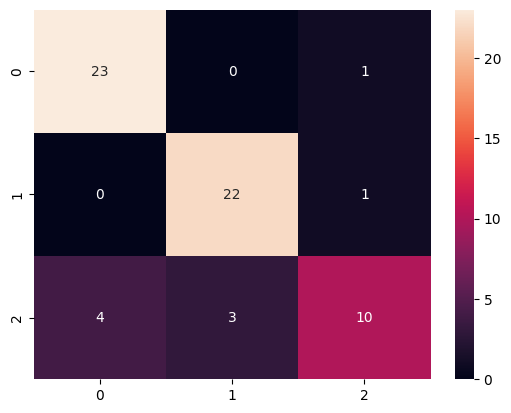

In [24]:
#modelling
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,f1_score,recall_score


x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)

vals = []
for i in range(1,200,1):
    vals.append(i)
    
num = np.random.rand(100)
    
params = {"n_estimators" : vals,
          "max_depth" : vals,
          "criterion": ["gini", "entropy", "log_loss"],
          "max_samples" : vals,
    
          }

random_classifier = RandomForestClassifier(class_weight="balanced_subsample")
random_class = RandomizedSearchCV(random_classifier,params)

random_class.fit(x_train,y_train)
pred_clf = random_class.predict(x_test)
print(classification_report(y_test,pred_clf))
print(f1_score(y_test,pred_clf,average="weighted")*100)
print(accuracy_score(y_test,pred_clf)*100)
print(random_class.best_score_)
print(random_class.best_params_)
sns.heatmap(confusion_matrix(y_test,pred_clf),annot = True);

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.96      1.00      0.98        23
           2       0.77      0.59      0.67        17

    accuracy                           0.84        64
   macro avg       0.84      0.82      0.82        64
weighted avg       0.84      0.84      0.84        64

83.76355861493533
84.375
[1 2 2 1 1 1 1 0 0 1 2 1 2 2 1 1 0 0 2 0 2 1 1 0 2 1 0 0 0 1 0 0 0 2 1 1 0
 0 0 2 2 0 0 2 0 1 0 0 0 1 1 1 1 2 0 0 1 0 0 0 1 1 1 0]


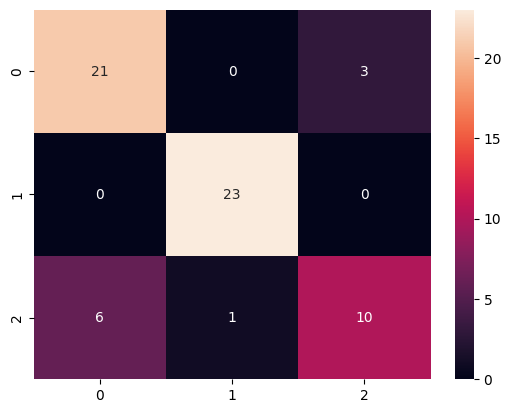

In [25]:
#modelling
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,f1_score,recall_score


x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)


random_classifier = RandomForestClassifier(n_estimators=170,max_samples= 198,max_depth= 45,
                            criterion="gini",class_weight="balanced_subsample")

random_classifier.fit(x_train,y_train)
pred_clf = random_classifier.predict(x_test)
print(classification_report(y_test,pred_clf))
print(f1_score(y_test,pred_clf,average="weighted")*100)
print(accuracy_score(y_test,pred_clf)*100)
print(pred_clf)
sns.heatmap(confusion_matrix(y_test,pred_clf),annot = True);

In [26]:
# {'n_estimators': 130, 'max_samples': 167, 'max_depth': 143, 'criterion': 'gini'}
# {'n_estimators': 138, 'max_samples': 159, 'max_depth': 168, 'criterion': 'entropy'}
# {'n_estimators': 170, 'max_samples': 198, 'max_depth': 45, 'criterion': 'entropy'} 
# {'n_estimators': 170, 'max_samples': 198, 'max_depth': 45, 'criterion': 'entropy'} = 86
# {'n_estimators': 69, 'max_samples': 176, 'max_depth': 68, 'criterion': 'log_loss'} = 83
# {'n_estimators': 197, 'max_samples': 163, 'max_depth': 144, 'criterion': 'entropy'} = 84
# {'n_estimators': 69, 'max_samples': 119, 'max_depth': 39, 'criterion': 'entropy'} = 87
# {'n_estimators': 178, 'max_samples': 171, 'max_depth': 92, 'criterion': 'gini'} = 87

In [27]:
# from sklearn.svm import SVC 
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import AdaBoostClassifier
# models = [SVC(decision_function_shape='ovo'),DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB(),AdaBoostClassifier()]

# def performance_checker():
#     for model in models:
#         model.fit(x_train,y_train)
#         pred = model.predict(x_test)
#         print(accuracy_score(y_test,pred))
        
# performance_checker()

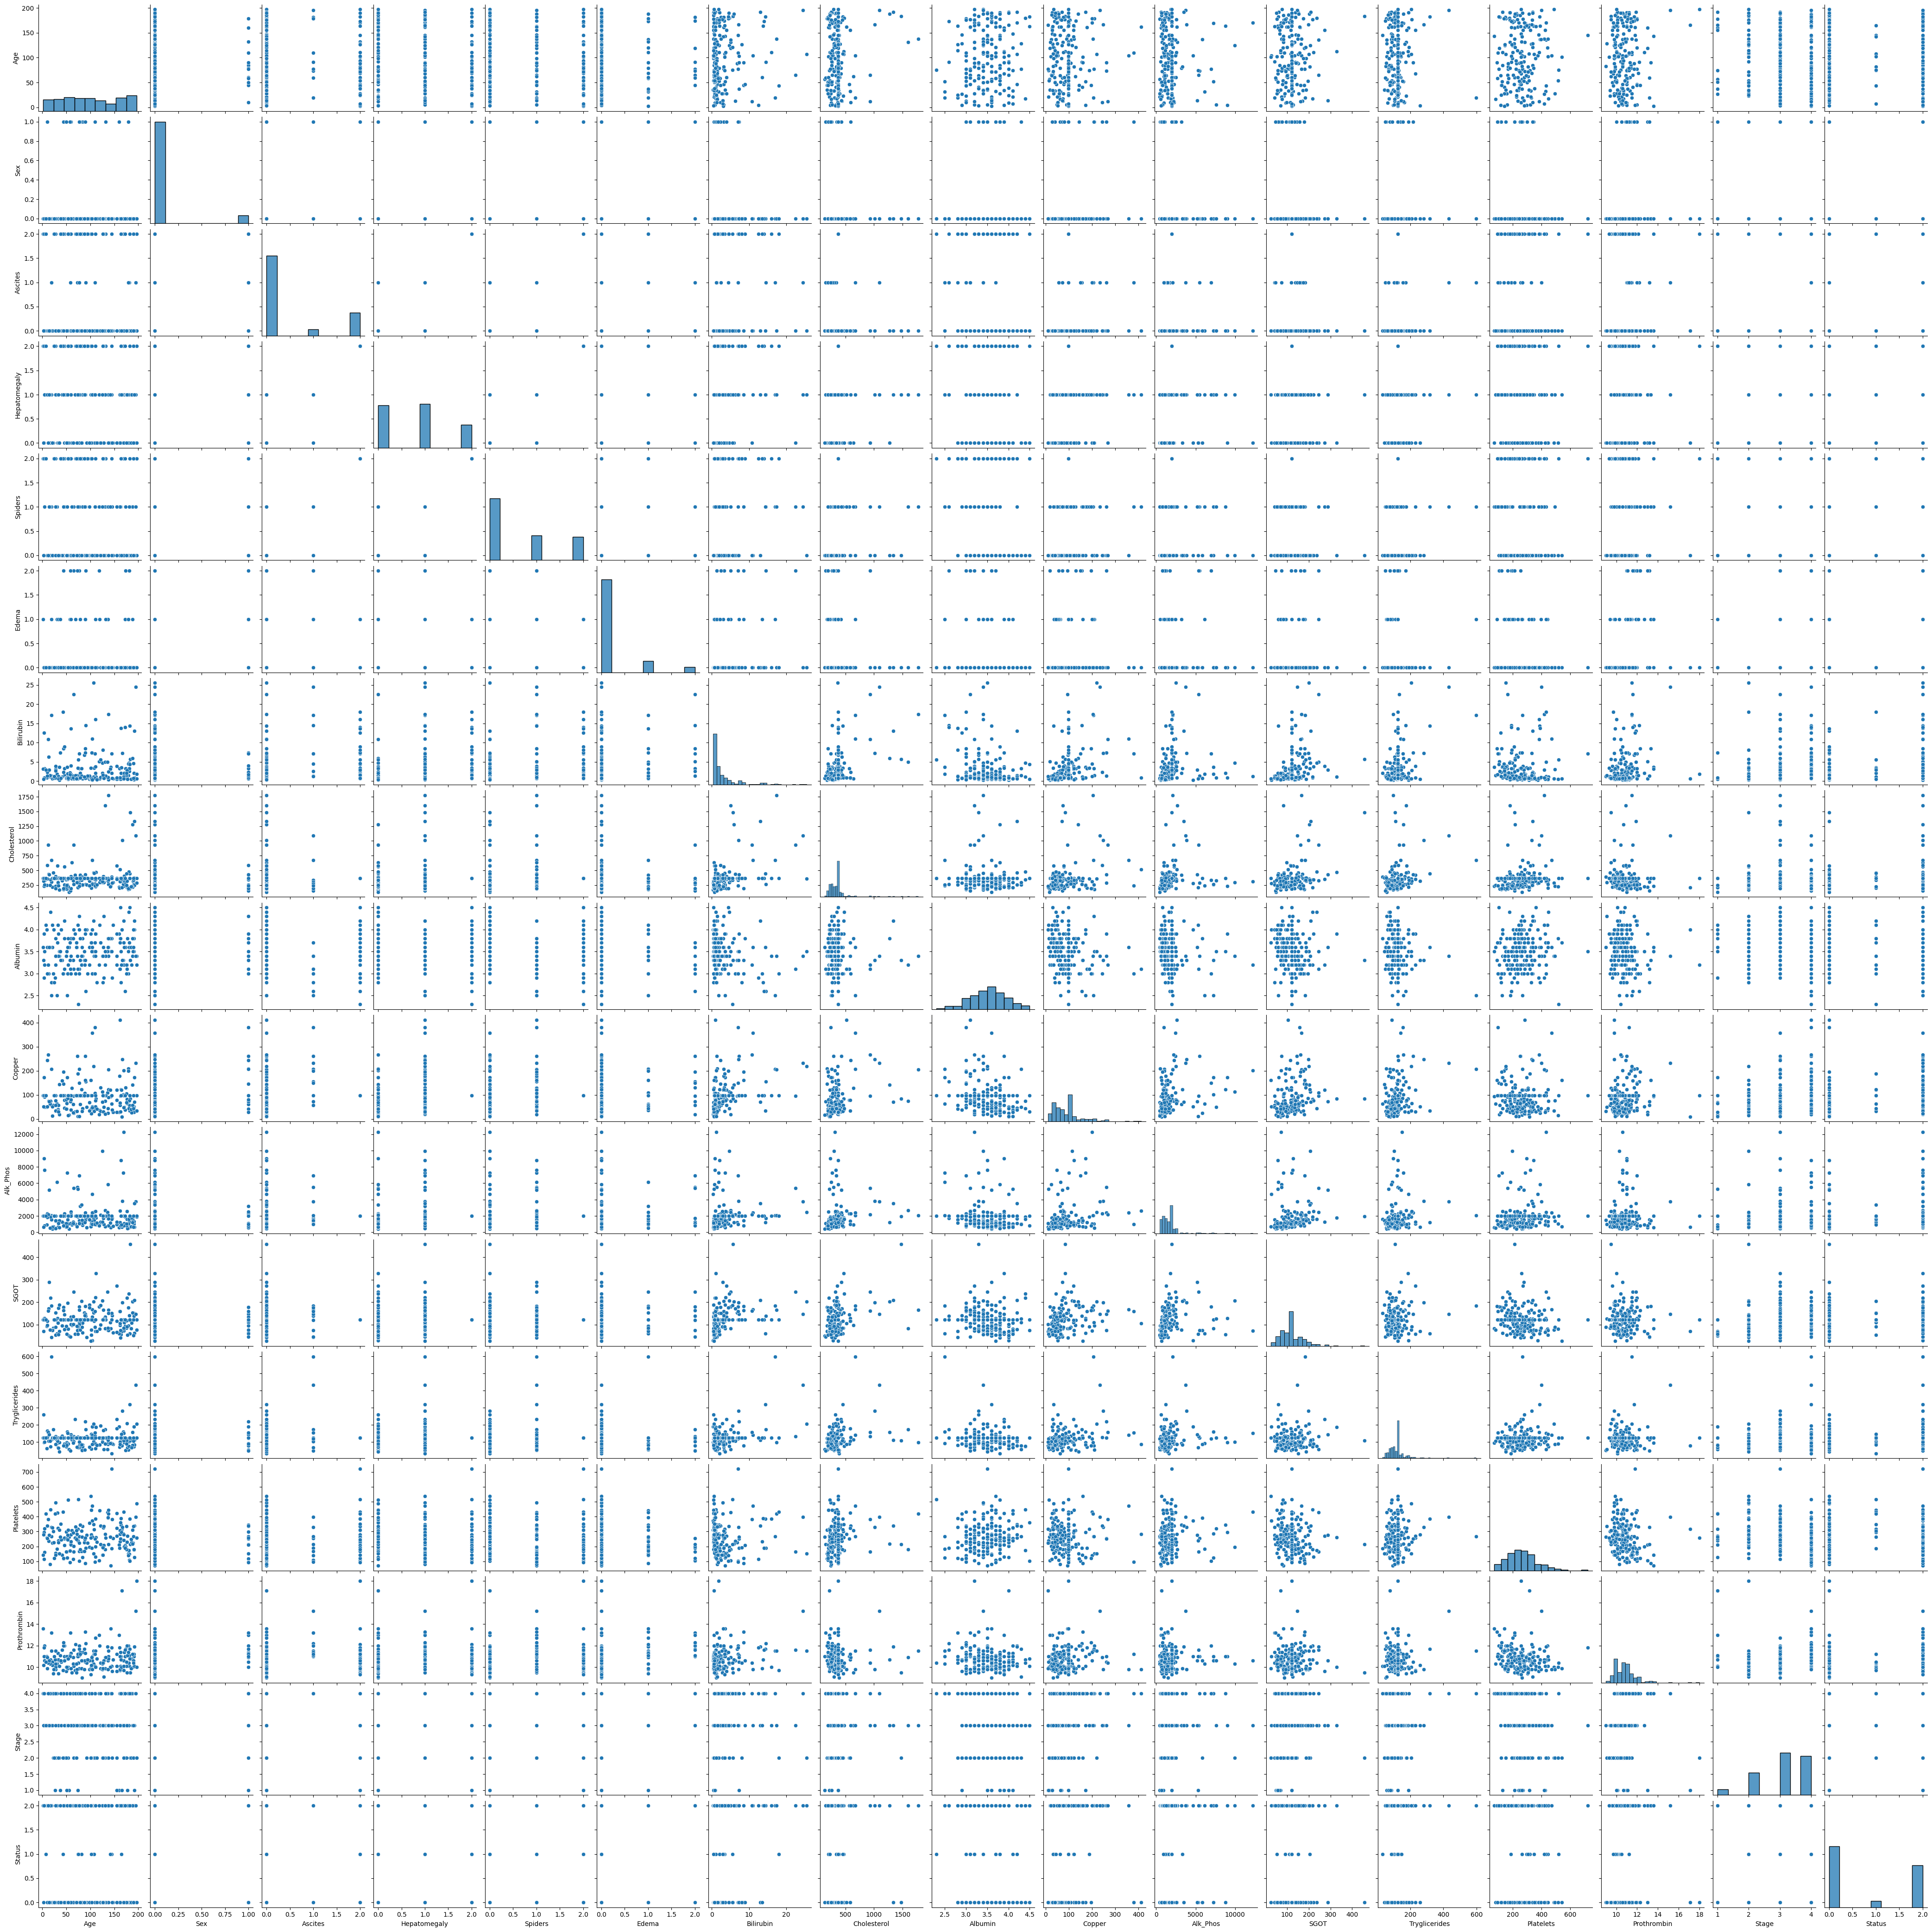

In [28]:
sns.pairplot(liver_cirrhosis);

In [29]:
cirrhosis[cirrhosis["Status"] == 0]

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
18,0,0,173,0,0,1,0,1,0.7,235.0,3.6,39.0,1881.0,93.0,123.0,209.0,11.0,3.0
20,0,1,84,1,0,1,1,0,0.6,252.0,3.8,41.0,843.0,65.1,83.0,336.0,11.4,4.0
24,0,1,33,0,0,0,0,0,0.7,298.0,4.1,40.0,661.0,107.0,66.0,324.0,11.3,2.0
28,0,1,137,0,0,0,0,0,0.7,370.0,3.8,24.0,5833.0,73.5,86.0,390.0,10.6,2.0
31,0,1,169,0,0,1,0,0,1.8,262.0,3.3,101.0,7277.0,82.6,158.0,286.0,10.6,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,0,2,53,0,2,2,2,0,1.0,369.5,3.6,97.6,1982.7,122.6,124.7,244.0,10.8,3.0
412,0,2,54,0,2,2,2,0,0.7,369.5,3.2,97.6,1982.7,122.6,124.7,312.0,10.8,3.0
414,0,2,79,0,2,2,2,0,0.9,369.5,3.8,97.6,1982.7,122.6,124.7,180.0,11.2,4.0
415,0,2,126,0,2,2,2,0,1.6,369.5,3.4,97.6,1982.7,122.6,124.7,143.0,9.9,3.0


## Heart Prediction

In [30]:
def heart_func(dataframe):

       heart_df = pd.read_csv(dataframe)
       return  heart_df
heart = heart_func("heart.csv")

heart = pd.read_csv("heart.csv")

In [31]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [32]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [33]:
heart["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [34]:
# looping to encode string feature to numerical features
from sklearn.preprocessing import LabelEncoder
heart = heart.select_dtypes(include=["number","object"])
column_features = heart.columns.tolist()

for column_feature in column_features:
    encoder = LabelEncoder()
    if heart[column_feature].dtypes in  [ "int64","float64"]:
        continue
    else:
        heart[column_feature] = encoder.fit_transform(heart[column_feature])
    

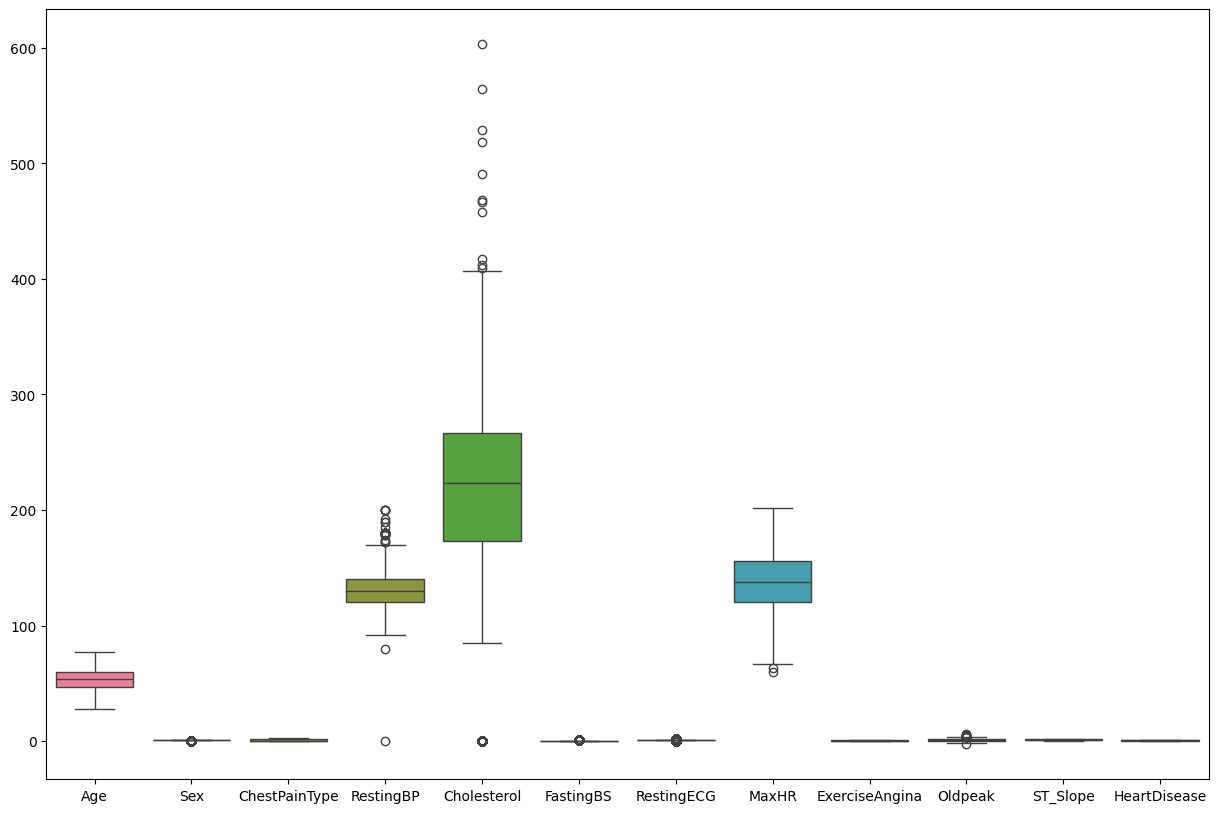

In [35]:
plt.figure(figsize=(15,10))
sns.boxplot(heart);
plt.show()


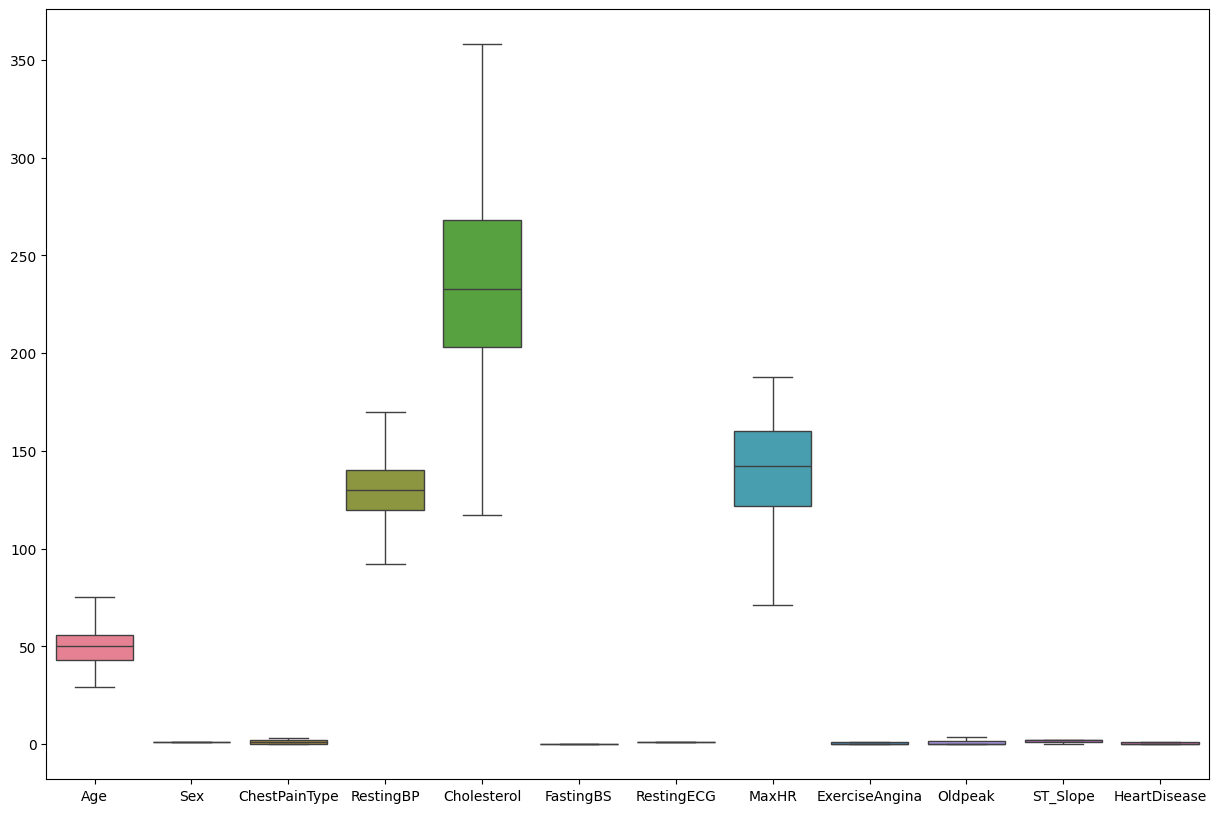

In [36]:
first_quartile,third_quartile = np.percentile(heart["Sex"],[25,75])
inter_quartile_range = third_quartile - first_quartile
lower_fence = first_quartile - (1.5* inter_quartile_range)
upper_fence = third_quartile + (1.5* inter_quartile_range)

new_heart = heart[(heart["Sex"] >= lower_fence) & (heart["Sex"] <= upper_fence)]

first_quartile,third_quartile = np.percentile(new_heart["RestingBP"],[25,75])
inter_quartile_range = third_quartile - first_quartile
lower_fence = first_quartile - (1.5* inter_quartile_range)
upper_fence = third_quartile + (1.5* inter_quartile_range)

new_heart_1 = new_heart[(new_heart["RestingBP"] >= lower_fence) & (new_heart["RestingBP"] <= upper_fence)]

first_quartile,third_quartile = np.percentile(new_heart_1["Cholesterol"],[25,75])
inter_quartile_range = third_quartile - first_quartile
lower_fence = first_quartile - (1.5* inter_quartile_range)
upper_fence = third_quartile + (1.5* inter_quartile_range)

new_heart_2 = new_heart_1[(new_heart_1["Cholesterol"] >= lower_fence) & (new_heart_1["Cholesterol"] <= upper_fence)]

first_quartile,third_quartile = np.percentile(new_heart_2["Cholesterol"],[25,75])
inter_quartile_range = third_quartile - first_quartile
lower_fence = first_quartile - (1.5* inter_quartile_range)
upper_fence = third_quartile + (1.5* inter_quartile_range)

new_heart_3 = new_heart_2[(new_heart_2["Cholesterol"] >= lower_fence) & (new_heart_2["Cholesterol"] <= upper_fence)]

first_quartile,third_quartile = np.percentile(new_heart_3["Cholesterol"],[25,75])
inter_quartile_range = third_quartile - first_quartile
lower_fence = first_quartile - (1.5* inter_quartile_range)
upper_fence = third_quartile + (1.5* inter_quartile_range)

new_heart_4 = new_heart_3[(new_heart_3["Cholesterol"] >= lower_fence) & (new_heart_3["Cholesterol"] <= upper_fence)]

first_quartile,third_quartile = np.percentile(new_heart_4["FastingBS"],[25,75])
inter_quartile_range = third_quartile - first_quartile
lower_fence = first_quartile - (1.5* inter_quartile_range)
upper_fence = third_quartile + (1.5* inter_quartile_range)

new_heart_5 = new_heart_4[(new_heart_4["FastingBS"] >= lower_fence) & (new_heart_4["FastingBS"] <= upper_fence)]

first_quartile,third_quartile = np.percentile(new_heart_5["RestingECG"],[25,75])
inter_quartile_range = third_quartile - first_quartile
lower_fence = first_quartile - (1.5* inter_quartile_range)
upper_fence = third_quartile + (1.5* inter_quartile_range)

new_heart_6 = new_heart_5[(new_heart_5["RestingECG"] >= lower_fence) & (new_heart_5["RestingECG"] <= upper_fence)]

first_quartile,third_quartile = np.percentile(new_heart_6["Oldpeak"],[25,75])
inter_quartile_range = third_quartile - first_quartile
lower_fence = first_quartile - (1.5* inter_quartile_range)
upper_fence = third_quartile + (1.5* inter_quartile_range)

heart_df = new_heart_6[(new_heart_6["Oldpeak"] >= lower_fence) & (new_heart_6["Oldpeak"] <= upper_fence)]


plt.figure(figsize=(15,10))
sns.boxplot(heart_df);

<Figure size 1500x1000 with 0 Axes>

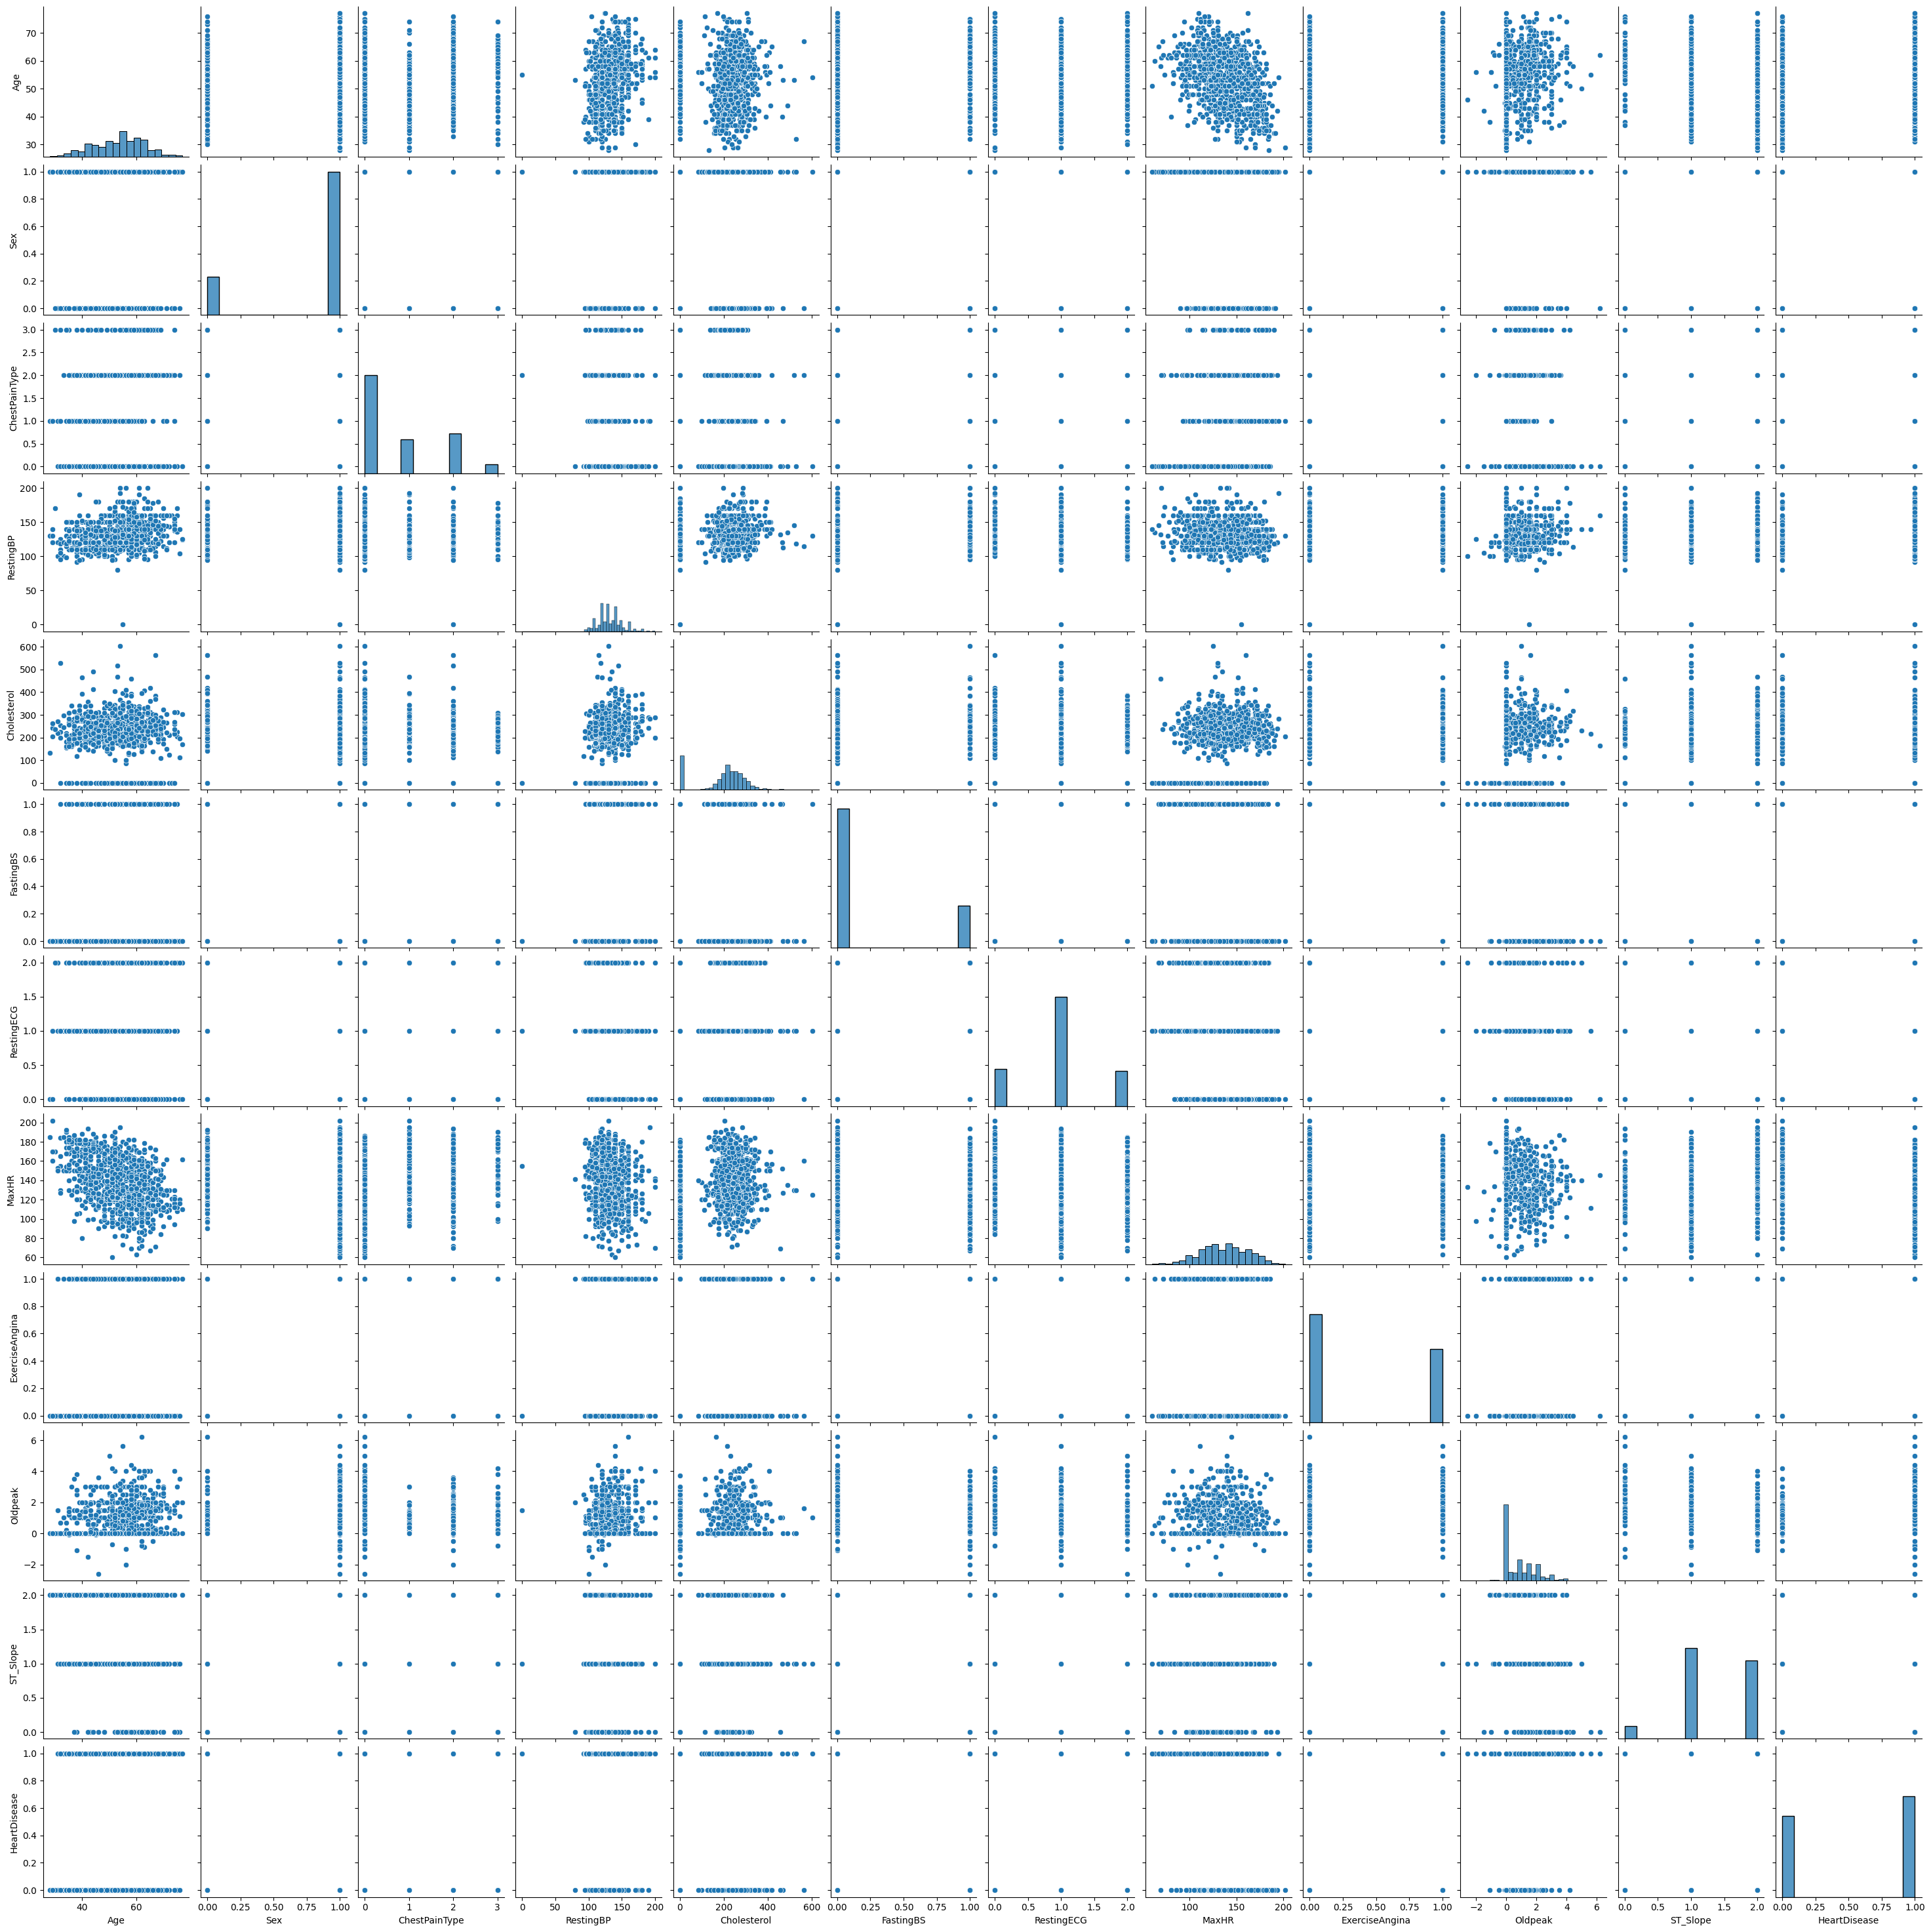

In [37]:
plt.figure(figsize=(15,10))
sns.pairplot(heart);

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# creating a list of models
models = [RandomForestClassifier(),GradientBoostingClassifier(),SVC(kernel="linear",C=10),KNeighborsClassifier(n_neighbors=10),
LogisticRegression(max_iter=150),SGDClassifier(max_iter=600,loss='log_loss',penalty="l1"),xgb.XGBClassifier(),
AdaBoostClassifier(n_estimators=100),LGBMClassifier(n_estimators=150),
CatBoostClassifier(),DecisionTreeClassifier(criterion='entropy',splitter='random'),GaussianNB()]

x = heart.iloc[:,:-1]
y = heart.iloc[:,-1]

def model_accuracy_comparison(modeller):

    for model in modeller:
        model.fit(x_train,y_train)
        model_predictor = model.predict(x_test)
        acc_score = accuracy_score(y_test,model_predictor)
        print(f"The accuracy for {model} is :- ",np.round(acc_score * 100,0))
        print("--------------------------------------")
        print()

model_accuracy_comparison(models)        
        



The accuracy for RandomForestClassifier() is :-  86.0
--------------------------------------

The accuracy for GradientBoostingClassifier() is :-  84.0
--------------------------------------

The accuracy for SVC(C=10, kernel='linear') is :-  69.0
--------------------------------------

The accuracy for KNeighborsClassifier(n_neighbors=10) is :-  70.0
--------------------------------------

The accuracy for LogisticRegression(max_iter=150) is :-  67.0
--------------------------------------

The accuracy for SGDClassifier(loss='log_loss', max_iter=600, penalty='l1') is :-  45.0
--------------------------------------



C:\Users\Efo Coder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...) is :-  86.0
--------------------------------------



C:\Users\Efo Coder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy for AdaBoostClassifier(n_estimators=100) is :-  80.0
--------------------------------------

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 699
[LightGBM] [Info] Number of data points in the train set: 254, number of used features: 15
[LightGBM] [Info] Start training from score -1.130615
[LightGBM] [Info] Start training from score -1.118494
[LightGBM] [Info] Start training from score -1.048698
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

## Testing Support Vector Machine on Heart Disease Dataset

In [74]:
heart_model = SVC(kernel="linear",C=10)
heart_model.fit(x_train,y_train)
heart_pred = heart_model.predict(x_test)
acc_score = accuracy_score(y_test,heart_pred)
print(f"The accuracy is :- ",np.round(acc_score * 100,0))

The accuracy is :-  69.0


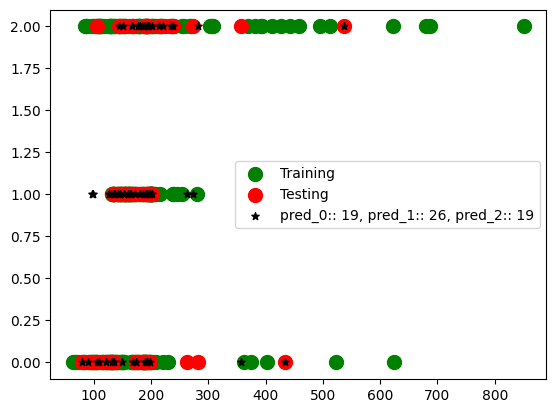

In [87]:
new_train = np.mean(x_train,axis = 1)
new_test = np.mean(x_test,axis = 1)

# create loop to sum each of the tatol class predicted
new_list = list(heart_pred)

Zero_0 = []
One_1 = []
Two_2 = []
count = 0

for i in new_list:
    
    if i == 0:
        count = count + 1
        Zero_0.append(i) 
    elif i == 1:
        count += 1
        One_1.append(i)   
    else:
        count += 1
        Two_2.append(i)
        

plt.scatter(new_train,y_train,s = 100,c="green",label="Training")
plt.scatter(new_test,y_test,s=100,c ="red",label="Testing")
plt.scatter(new_test,heart_pred,marker = "*",s = 30,c ="black",label = f"pred_0:: {len(Zero_0)}, pred_1:: {len(One_1)}, pred_2:: {len(Two_2)}")
plt.legend();